In [1]:
## Exploring algorithms for UFC project
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [2]:
path = os.getcwd()
p = path.removesuffix('ufcPredictionProject')
p = p+'UFCdata.csv'


df = pd.read_csv(p)
print(df.shape)
df.head(3)

(6012, 144)


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Aalon Cruz,Spike Carlyle,Scott Howard,2/29/2020,"Norfolk, Virginia, USA",Blue,False,Featherweight,NaN,NaN,...,0,0,0,0,Switch,182.88,198.12,145.0,26.0,30.0
1,Aaron Phillips,Matt Hobar,Kevin Nix,8/23/2014,"Tulsa, Oklahoma, USA",Blue,False,Bantamweight,0.0,0.0,...,0,0,0,0,Southpaw,175.26,180.34,135.0,27.0,25.0
2,Aaron Riley,Justin Salas,Randy Corley,7/27/2013,"Seattle, Washington, USA",Blue,False,Lightweight,0.0,1.0,...,3,0,0,0,Southpaw,172.72,175.26,155.0,31.0,32.0


In [3]:
# removing features that are anticipated to not be significant
df = df.drop(['R_fighter','B_fighter','Referee','location'],axis=1)

# removing rows that contain NaN
df.dropna(inplace=True)
print(df.shape)
df.head(3)
print(df.isnull().sum().sum())

(3914, 140)
0


In [4]:
# test train split
(df_train,df_test) = train_test_split(df, train_size = 0.8)

X_train = df_train.drop('Winner',axis=1)
y_train = df_train.Winner
X_test = df_test.drop('Winner',axis=1)
y_test = df_test.Winner

X = X_train
y = y_train

print(X.isnull().sum().sum())

0


In [5]:
# make time a continuous feature
X.date = pd.to_datetime(X.date)
X.date = pd.to_numeric(X.date)

In [6]:
# split features into numerical and categorical
X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')

In [7]:
# one hot encode
X_cat = pd.get_dummies(X_cat)

In [8]:
# finding columns that are all zeros from X_num
cols = pd.Series(X_num.columns)
for i in range(len(cols)):
    if (X_num.iloc[:,i] == 0).all():
        print(cols[i])

B_draw
R_draw


In [9]:
# removing columns of zeros
X_num = X_num.drop(['B_draw', 'R_draw'], axis=1)

In [10]:
# standardize
X_num = (X_num - X_num.mean())/X_num.std()

In [11]:
# put back together
X = pd.concat([X_num,X_cat], axis=1)

In [15]:
print(X.shape)
X.head()

(3131, 155)


,date,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,...,weight_class_WomenFlyweight,weight_class_WomenStrawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
1079,1.357845,-0.701846,2.715854,-0.450113,3.461086,-1.121242,-1.021014,-0.682964,-0.638606,-0.472711,...,0,0,0,1,0,0,0,1,0,0
4367,-0.374845,-0.701846,-0.571722,-0.202049,0.019776,-1.121242,3.014026,2.216666,-0.638606,2.568008,...,0,0,0,1,0,0,0,0,1,0
1787,1.054861,-0.701846,-0.571722,-1.442366,0.101712,1.935285,-0.012254,1.491759,1.038862,1.047649,...,0,0,0,1,0,0,0,1,0,0
4421,0.084365,-0.701846,-0.571722,1.203642,0.716232,1.520201,0.996506,0.766851,0.200128,-0.472711,...,0,1,0,0,1,0,0,1,0,0
5440,-2.036523,0.731561,0.455646,0.671340,-0.512808,-1.062281,0.320637,-0.682964,-0.009555,-0.092621,...,0,0,0,1,0,0,0,1,0,0


In [20]:
print(y.value_counts())

Red     1917
Blue    1158
Draw      56
Name: Winner, dtype: int64


In [21]:
# logistic regression
logr = LogisticRegression(random_state=0, max_iter=1000)
logr.fit(X,y)


LogisticRegression(max_iter=1000, random_state=0)

In [22]:
# Training score
print('Training Score:',logr.score(X,y).round(3))

Training Score: 0.674


## Finding Test Error

In [30]:
X_train = X
y_train = y

In [31]:
X = X_test
y = y_test

In [32]:
y.value_counts()

Red     494
Blue    276
Draw     13
Name: Winner, dtype: int64

In [33]:
# make time a continuous feature
X.date = pd.to_datetime(X.date)
X.date = pd.to_numeric(X.date)

In [34]:
# split features into numerical and categorical
X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')

In [35]:
# one hot encode
X_cat = pd.get_dummies(X_cat)

In [36]:
# removing columns of zeros
X_num = X_num.drop(['B_draw', 'R_draw'], axis=1)

In [37]:
# standardize
X_num = (X_num - X_num.mean())/X_num.std()

In [38]:
# put back together
X = pd.concat([X_num,X_cat], axis=1)
print(X.shape)
X.head()

(783, 155)


,date,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,...,weight_class_WomenFlyweight,weight_class_WomenStrawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
371,-0.749994,-0.658970,-0.520827,1.519958,0.845580,1.512989,-0.156880,-0.628484,3.552311,0.310948,...,0,0,0,1,0,0,0,1,0,0
2122,0.783948,1.723717,-0.520827,0.072806,1.004663,0.833316,-0.735513,-0.623120,-0.607705,-0.463794,...,0,0,0,0,1,0,0,1,0,0
4296,-0.089974,-0.658970,2.619944,0.451356,-0.325120,0.833316,1.500015,-0.628484,-0.607705,2.635175,...,0,0,0,0,1,0,0,1,0,0
4264,-1.296195,-0.072885,-0.520827,-1.514872,-0.058118,-0.137646,0.879891,4.177617,-0.607705,-0.463794,...,0,0,0,1,0,0,1,0,0,0
5143,0.427445,-0.658970,-0.520827,-0.782879,1.282025,0.095385,0.274300,0.315572,-0.607705,-0.076423,...,0,0,0,1,0,0,0,1,0,0


In [58]:
# logistic regression
logr = LogisticRegression(random_state=0, max_iter=1000)
logr.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [59]:
# Test score
print('Test Score:',logr.score(X,y).round(3))

Test Score: 0.632


## Feature Selection

In [51]:
from sklearn.model_selection import GridSearchCV

In [26]:
X_test = X
y_test = y

In [65]:
# LASSO to find insignificant features to drop
grid = {'C':[0.01, 0.1, 1, 10, 100]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear',max_iter=1000)
gs_model = GridSearchCV(estimator=lr_model, param_grid=grid)
gs_model.fit(X_train, y_train)
# TAKES ROUGHLY 6 MINUTES TO RUN!!!

GridSearchCV(estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [66]:
gs_model.best_params_

{'C': 0.1}

In [27]:
# Train a LR model with best parameters
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [29]:
# viewing coefficients after LASSO
coef = model.coef_[0]
coef

array([ 4.01886194e-01,  0.00000000e+00, -4.39901873e-02,  0.00000000e+00,
       -5.79967186e-02, -2.24067742e-02, -8.52151455e-02,  0.00000000e+00,
       -2.52123458e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -7.41298734e-02,  0.00000000e+00, -6.79227052e-02,  1.99176552e-01,
        0.00000000e+00,  5.74636226e-02,  1.16530151e-01,  8.76015229e-02,
        0.00000000e+00,  0.00000000e+00, -7.28007169e-02,  8.20826461e-02,
        0.00000000e+00,  0.00000000e+00, -3.25442630e-02,  0.00000000e+00,
       -1.29168749e-02,  0.00000000e+00,  2.60666995e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -3.53554311e-03,  5.38478231e-02,
        0.00000000e+00, -5.57169623e-02,  0.00000000e+00, -2.17316345e-02,
        0.00000000e+00,  3.11336099e-02,  0.00000000e+00, -1.09173117e-01,
        0.00000000e+00,  

In [30]:
# storing coefficients and feature name in data frame
coef_df = pd.DataFrame()
coef_df['features'] = X_train.columns
coef_df['coefficient'] = coef
print(coef_df.shape)
print(coef_df.iloc[0,1])
coef_df.head()

(155, 2)
0.4018861936333985


,features,coefficient
0,date,0.401886
1,B_avg_KD,0.000000
2,B_avg_opp_KD,-0.043990
3,B_avg_SIG_STR_pct,0.000000
4,B_avg_opp_SIG_STR_pct,-0.057997


In [31]:
# remove features with zero coefficients
coef_df = coef_df[coef_df['coefficient'] != 0]
coef_df = coef_df.sort_values(by=['coefficient'],ascending=False)

print(coef_df.shape)
coef_df.head()

(63, 2)


,features,coefficient
0,date,0.401886
19,B_avg_TD_att,0.199177
132,R_age,0.194382
113,R_avg_opp_CTRL_time(seconds),0.131601
22,B_avg_opp_TD_landed,0.116530


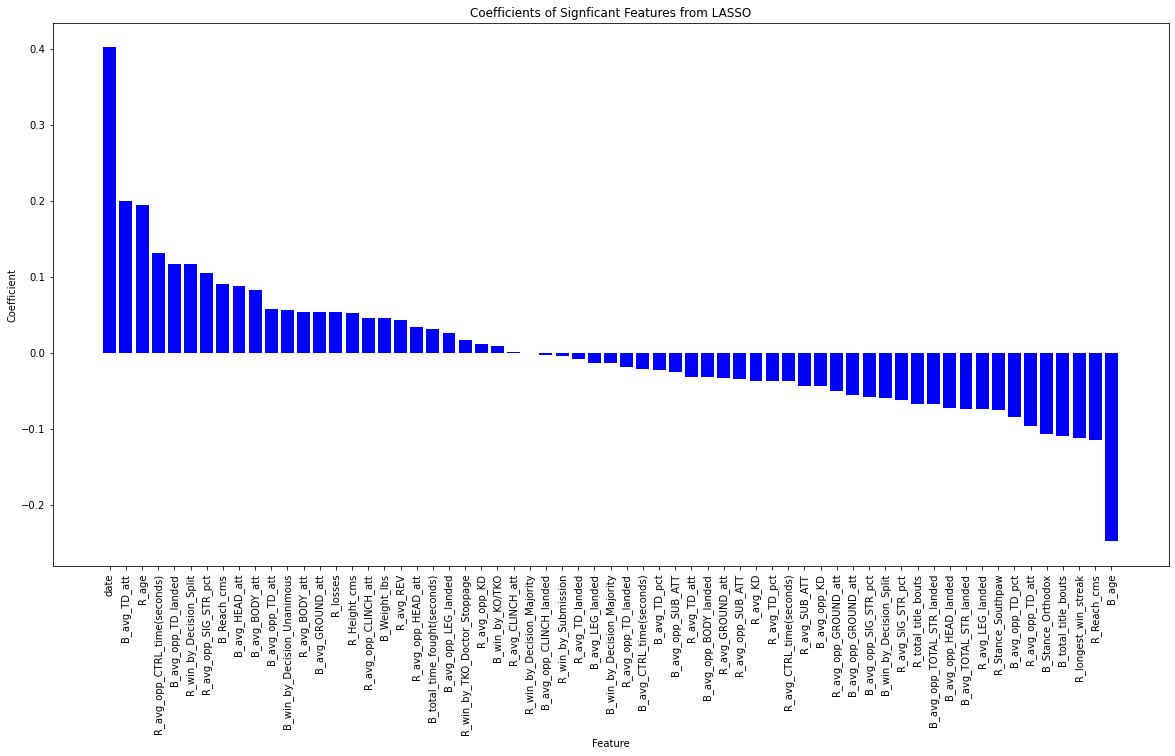

In [32]:
# plot coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar('features', 'coefficient', data = coef_df, color = "blue")
plt.xlabel("Feature")
plt.xticks(rotation = 90)
plt.ylabel("Coefficient")
plt.title("Coefficients of Signficant Features from LASSO")
plt.show()

In [33]:
# removing insifnificant features from X
X_train_imp = X_train[coef_df.features]
X_test_imp = X_test[coef_df.features]
X_train_imp.head(3)

,date,B_avg_TD_att,R_age,R_avg_opp_CTRL_time(seconds),B_avg_opp_TD_landed,R_win_by_Decision_Split,R_avg_opp_SIG_STR_pct,B_Reach_cms,B_avg_HEAD_att,B_avg_BODY_att,...,B_avg_TOTAL_STR_landed,R_avg_LEG_landed,R_Stance_Southpaw,B_avg_opp_TD_pct,R_avg_opp_TD_att,B_Stance_Orthodox,B_total_title_bouts,R_longest_win_streak,R_Reach_cms,B_age
4837,0.319473,-0.143214,0.182037,-0.810457,-0.860238,3.730235,0.361522,0.190629,-0.214593,0.190032,...,0.049324,1.451122,1,-1.018241,-0.381378,1,0.471803,1.436746,-0.300231,0.799668
1606,0.013357,0.421028,0.660191,-0.322625,0.302511,0.856375,1.462910,-0.056825,0.449686,0.335297,...,-0.253060,-0.930324,1,0.920311,-0.505923,1,-0.288864,0.489304,0.872746,1.296692
1392,1.364975,-0.598684,0.421114,-0.893515,-0.825053,0.856375,1.337908,-1.789002,-0.633992,-0.722181,...,-0.386058,-0.962349,0,-0.905321,-0.440653,1,-0.288864,0.489304,-1.004017,-0.442893


In [34]:
# Rerunning Logistic Regression with reduced feature set
logr = LogisticRegression(random_state=0, max_iter=1000)
logr.fit(X_train_imp,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [35]:
# Scores
print('Train Score:',logr.score(X_train_imp,y_train).round(3))
print('Test Score:',logr.score(X_test_imp,y_test).round(3))

Train Score: 0.664
Test Score: 0.648
